#KMeans
## ALUMNO: Max Andrés Luque
Un shopping recolectó información anónima de los clientes para implementar nuevas
estratégias de marketing y lograr aumentar las ventas.
Los clientes brindaron la siguiente infomación:
- Sexo
- Edad
- Ingresos semanales (en miles de pesos)

Quienes recolectaron la información agregaron un número de identificación a cada cliente y
un puntaje de acuerdo a su personalidad y a las compras realizadas. Este puntaje va desde
0 (peor cliente) a 100 (mejor cliente).

Analice la información implementando KMeans para ayudar a los dueños del shopping a
reconocer los distintos grupos de clientes que compran en el lugar.
Tenga en cuenta analizar la información para corroborar que no falten datos. ¿Es necesario
utilizar todos los datos brindados? Saque conclusiones al respecto a los grupos
conformados e intente describir que tipo de clientes son.
No hay una única forma de resolver el problema, por lo que es importante que deje
comentado las decisiones que tomó y las conclusiones a las que llegó.



In [ ]:
#Instalación de librerias.
!pip install sklearn
!pip install numpy
!pip install matplotlib
!pip install pandas

#Importación de librerias con nombres abreviados.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize

#Importación de drive para acceder al Dataset
from google.colab import drive
drive.mount('/content/drive')

#Visualización de archivos en entorno Colab de Drive
!cat '/content/drive/MyDrive  


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


Se carga el csv a analizar a entorno colab.

In [ ]:
clientescsvhm =pd.read_csv("/content/drive/MyDrive/clientes-kmeans.csv")#importo csv a analizar
clientescsv= clientescsvhm.copy(deep=True) #hago una copia del dataset para no modificar el original

In [ ]:
clientescsv.info() #verifico la información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         200 non-null    int64 
 1   sexo                       200 non-null    object
 2   edad                       200 non-null    int64 
 3   ingresosSemanales(miles$)  200 non-null    int64 
 4   puntaje(1-100)             200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
print(clientescsv.head()) #Imprimo las primeras 5 filas para ver los datos contenidos

   id sexo  edad  ingresosSemanales(miles$)  puntaje(1-100)
0   1    M    19                         15              39
1   2    M    21                         15              81
2   3    F    20                         16               6
3   4    F    23                         16              77
4   5    F    31                         17              40


In [ ]:
del(clientescsv["id"]) # Saco la fila id ya qe no va a ser utilizada
del(clientescsv["sexo"]) # Saco la fila sexo ya que no va a ser relevante para el primer analisis 
print(clientescsv.isnull().sum()) #verifico si hay faltante de datos. 

edad                         0
ingresosSemanales(miles$)    0
puntaje(1-100)               0
dtype: int64


In [ ]:
print(clientescsv.describe()) #veo los valores min, maximos, valores medios, etc.

             edad  ingresosSemanales(miles$)  puntaje(1-100)
count  200.000000                 200.000000      200.000000
mean    38.850000                  60.560000       50.200000
std     13.969007                  26.264721       25.823522
min     18.000000                  15.000000        1.000000
25%     28.750000                  41.500000       34.750000
50%     36.000000                  61.500000       50.000000
75%     49.000000                  78.000000       73.000000
max     70.000000                 137.000000       99.000000


#Normalización de datos

Normalizar los datos ayuda al clustering porque los grupos se forman a partir de distancias. Si hay atributos con escalas muy diferentes, los atributos de escala mayor dominarán las distancias. Por eso para tener una buena utilización de KMeans se normalizaran los datos y se buscarán los grupos con los datos normalizados.

In [ ]:
clientescsv = pd.DataFrame (normalize(clientescsv) ,columns= clientescsv.columns )

En un principio graficaremos los datos en un grafico 3D para ver la distribución de los mismos según estos 3 parametros.

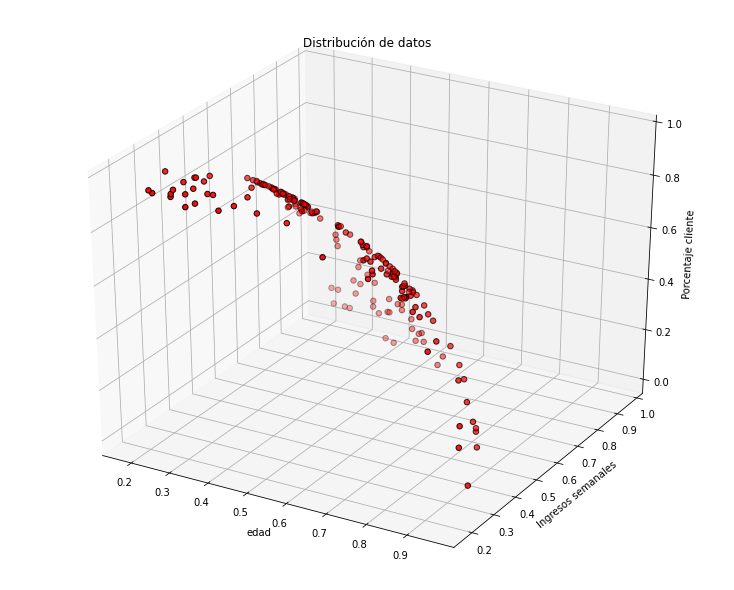

In [ ]:
x = np.array(clientescsv[["edad","ingresosSemanales(miles$)","puntaje(1-100)"]]) #creamos un arreglo para los datos normalizados
xsinnorm = np.array(clientescsvhm[["edad","ingresosSemanales(miles$)","puntaje(1-100)"]]) #creamos un arreglo para luego graficar y comparar los normalizados
figura = plt.figure(figsize=(10,8)) #Creamos una figura para crear nuestro grafico 3D tamaño 10,8
ax = Axes3D(figura) #Cremos el grafico 3d
ax.scatter(x[:, 0], x[:, 1], x[:, 2],s=30,c = "red",edgecolor='black') #Se realiza un grafico para ver como estan distribuidos
ax.set_xlabel("edad") #Nombre eje x
ax.set_ylabel("Ingresos semanales") # Nombre eje y
ax.set_zlabel("Porcentaje cliente") # Nombre eje z 
plt.title('Distribución de datos') # Nombre de titulo
plt.show()# Mostramos el gráfico

Antes de iniciar KMeans es necesario determinar que numero de n_clusters que se va a utilizar ya que va a ser determinante para nuestro posterior análisis de la cantidad de grupos de clientes que se van a obtener.

# ***Codo de jambú:*** 
Este es un algoritmo que se utiliza para ver gráficamente cuál sería el n_clusters a utilizar. Este indica desde un clusters 1 hasta los que nosotros decidamos colocar como maximo y verifica las distancias que hay entre cada centroide y los datos, aumentando o disminuyendo dependiendo la cantidad que estos. A continuación se realizará esta curva con el correspondiente comentado para elegir nuestro cluster a utilizar para kMeans. Hay que tener en cuenta que el mejor a usar es aquel donde empieza a cambiar la curva generada por este algoritmo. 

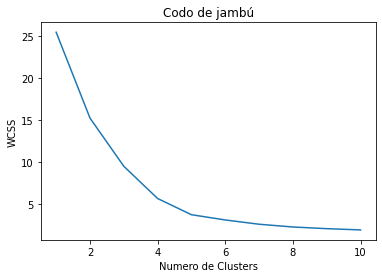

In [ ]:
wcss = [] #creo una lista para ir almacenando los valorse wcss 
          #wcss es un indicador de cuan similares son los individuos dentro de los clusters

for i in range(1,11): #Creo un ciclo for para ir guardando cada wcss para cada cada uno de los clusters de 1 - 10
    kmeans = KMeans(n_clusters=i) #aplico el metodo KMeans para cada clusters y lo guardo como objeto en kmeans
    kmeans.fit(clientescsv) #aplico kmeans a mi base de datos
    wcss.append(kmeans.inertia_) #Le agergo a wcss los valores de inertia_ que son las sumas de las distancias entre clusters mas cercanos al centro

lista110 = [1,2,3,4,5,6,7,8,9,10]

plt.plot((lista110),wcss) #grafico todos los closters posibles en el eje x y todos los wcss anteriormente para ver que n_cluster voy a utilizar
plt.xlabel('Numero de Clusters') #Nombre eje x
plt.ylabel('WCSS') # Nombre eje y
plt.title('Codo de jambú') # Nombre de titulo
plt.show() #mostrar grafico

Se puede observar que segun el gráfico el mejor cluster a utilizar con los tres datos es 4. 


Se realizara la utilización de KMeans con 4 centroides. Utilizando los datos brindados por el dataset de Edad, Ingresos semanales y Puntaje de cliente.

In [ ]:
km = KMeans(n_clusters=4, init='random', random_state=0)  # Creo el clasificador
y_km = km.fit_predict(x)  # Obtengo la clasificación de cada muestra de X
centros = km.cluster_centers_ #Obtenemos los centroides.

Una vez realizado KMeans vamos a analizar los datos graficarlos y determinar grupos.

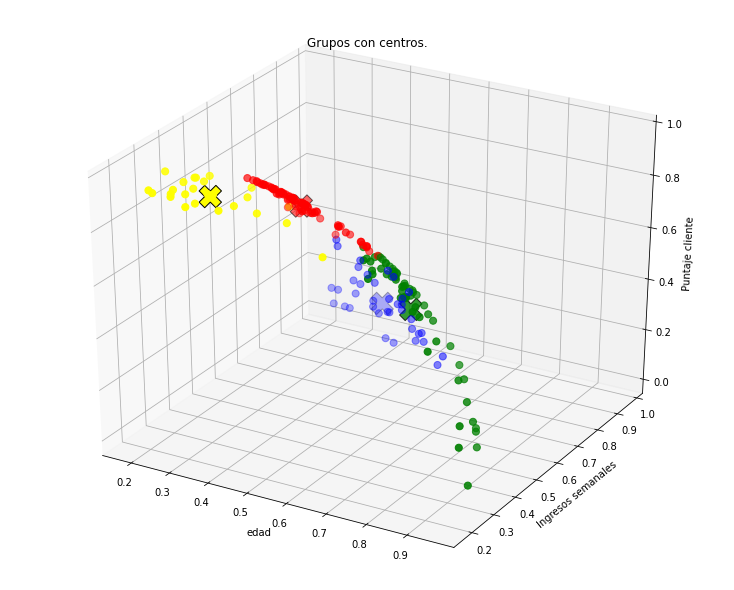

In [ ]:
colores=['green','blue','yellow','red'] #defino los 4 colores de mis grupos 

coloresgrupos=[] #creo una lista para poder agregar los colores para cada fila de mis datos 

for coloresfil in y_km: #Realizo un ciclo for para asignar los colores a cada uno de mis datos
    coloresgrupos.append(colores[coloresfil])

figura = plt.figure(figsize=(10,8)) #Creamos una figura para crear nuestro grafico 3D tamaño 10x8


ax = Axes3D(figura) #Cremos el grafico 3D
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=coloresgrupos, marker = "o", s=50) #Grafico mis datos con los colores de cada grupo
ax.scatter(centros[:, 0], centros[:, 1], centros[:, 2], marker='X', c=colores,edgecolor='black', s=500) #Grafico los 4 centros obtenidos 
ax.set_xlabel("edad") #Nombre eje x
ax.set_ylabel("Ingresos semanales") # Nombre eje y
ax.set_zlabel("Puntaje cliente") #Nombre eje z
plt.title('Grupos con centros.') # Nombre de titulo
plt.show()# Mostramos el gráfico


Distribución de los Grupos

In [ ]:
print(y_km) #conformación de grupos normalizados 

[2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 3 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 3 3 0 0 0 0 0
 3 3 3 3 3 0 3 0 3 3 3 3 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 3 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


Veremos como quedan conformados los grupos en grafica con datos no normalizados

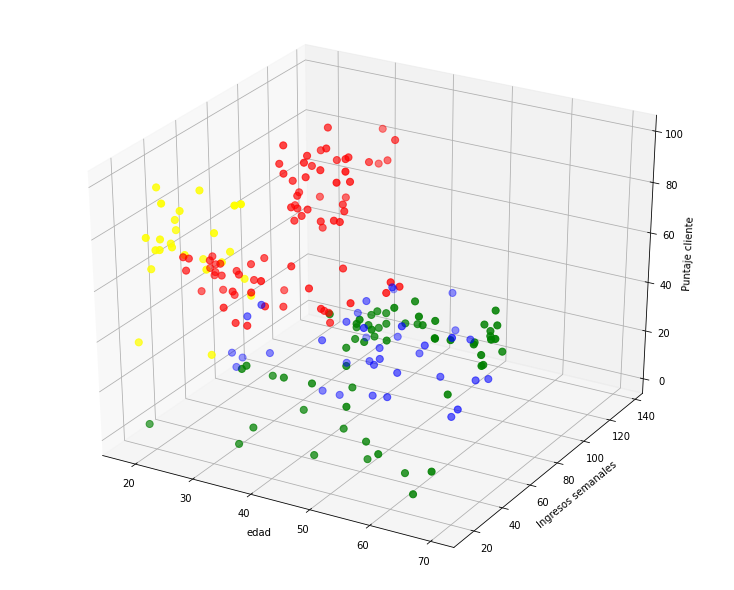

In [ ]:
figura = plt.figure(figsize=(10,8)) #Creamos una figura para crear nuestro grafico 3D tamaño 10x8
ax = Axes3D(figura) #Cremos el grafico 3D
ax.scatter(xsinnorm[:, 0], xsinnorm[:, 1], xsinnorm[:, 2], c=coloresgrupos, marker = "o", s=50) #Grafico mis datos con los colores de cada grupo
ax.set_xlabel("edad") #Nombre eje x
ax.set_ylabel("Ingresos semanales") # Nombre eje y
ax.set_zlabel("Puntaje cliente") #Nombre eje z
plt.show()

Debido al que el grafico 3D no muestra bien los datos, analizaremos cada cara para ver mejor los mismos y poder ver mejor estos grupos de clientes. Además se puede ver que con la normalización de los datos agrupa de otra manera mucho mejor que si lo haria sin dicha normalización.

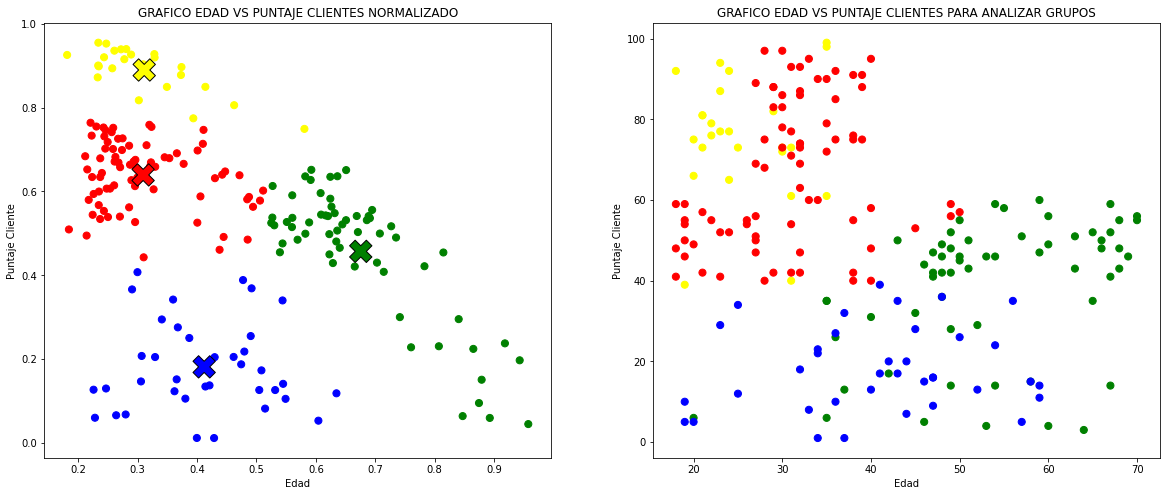

In [ ]:
plt.figure(figsize=(20,8)) #Tamaño de figura

plt.subplot(121) #Primer grafico 
plt.scatter(x[:, 0], x[:, 2], c=coloresgrupos, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.scatter(centros[:, 0],centros[:, 2], marker='X', c=colores,edgecolor='black', s=500)#Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 500 los centroides.
plt.xlabel("Edad") #Valor eje x
plt.ylabel("Puntaje Cliente") #Valor eje y
plt.title("GRAFICO EDAD VS PUNTAJE CLIENTES NORMALIZADO") #Titulo del grafico


plt.subplot(122) #Segundo gráfico
plt.scatter(xsinnorm[:, 0], xsinnorm[:, 2], c=coloresgrupos, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.xlabel("Edad") #Valor eje x
plt.ylabel("Puntaje Cliente") #Valor eje y
plt.title("GRAFICO EDAD VS PUNTAJE CLIENTES PARA ANALIZAR GRUPOS") #Titulo del grafico
plt.show() #Muestro grafico

##ANALISIS GRAFICO EDAD VS PUNTAJES CLIENTES

1.   Grupo con puntaje de cliente menor al 40% y menores de 60 años.(Color AZUL)
2.   Grupo con puntaje menores al 60% y mayores a 35 años (Color VERDE)
3.   Grupo con puntaje mayor a 60% y menores de 35 años (Color Amarillo)
4.   Grupo con puntaje mayor a 40% y menores de 50 años (Color ROJO)


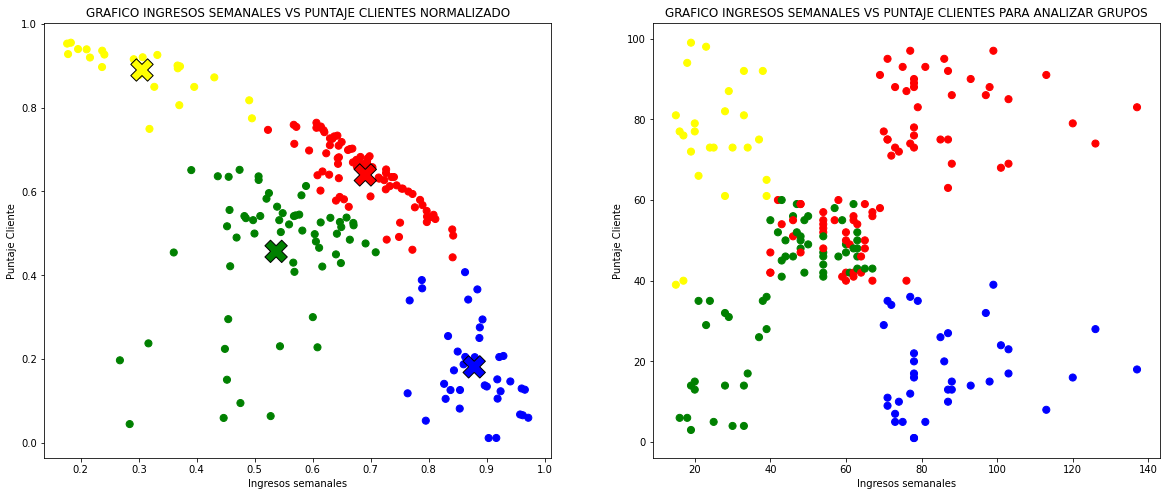

In [ ]:
plt.figure(figsize=(20,8)) #Creo figura de 10x8

plt.subplot(121)
plt.scatter(x[:, 1], x[:, 2], c=coloresgrupos, marker = "o", s=50) #Represento en el eje x ingresos semanales y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.scatter(centros[:, 1],centros[:, 2], marker='X', c=colores,edgecolor='black', s=500)#Represento en el eje x ingresos semanales y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 500 los centroides.
plt.xlabel("Ingresos semanales")#Valor eje x
plt.ylabel("Puntaje Cliente")#Valor eje y
plt.title("GRAFICO INGRESOS SEMANALES VS PUNTAJE CLIENTES NORMALIZADO")#Titulo del grafico

plt.subplot(122)
plt.scatter(xsinnorm[:, 1], xsinnorm[:, 2], c=coloresgrupos, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.xlabel("Ingresos semanales") #Valor eje x
plt.ylabel("Puntaje Cliente") #Valor eje y
plt.title("GRAFICO INGRESOS SEMANALES VS PUNTAJE CLIENTES PARA ANALIZAR GRUPOS") #Titulo del grafico
plt.show() #Muestro grafico

##ANALISIS GRAFICO INGRESOS SEMANALES VS PUNTAJES CLIENTES

1.   Grupo con puntaje menor al 40% e ingresos semanales mayores a 70 en miles de pesos (Color AZUL)
2.   Grupo con puntaje menor al 60% e ingresos semanales menores a 65 en miles de pesos. (Color VERDE)
3.   Grupo con puntaje mayor al 60% e ingresos semanales menores a 40 en miles de pesos. (Color Amarillo)
4.   Grupo con puntaje mayor al 40% e ingresos semanales mayores a 40 en miles de pesos. (Color Rojo)



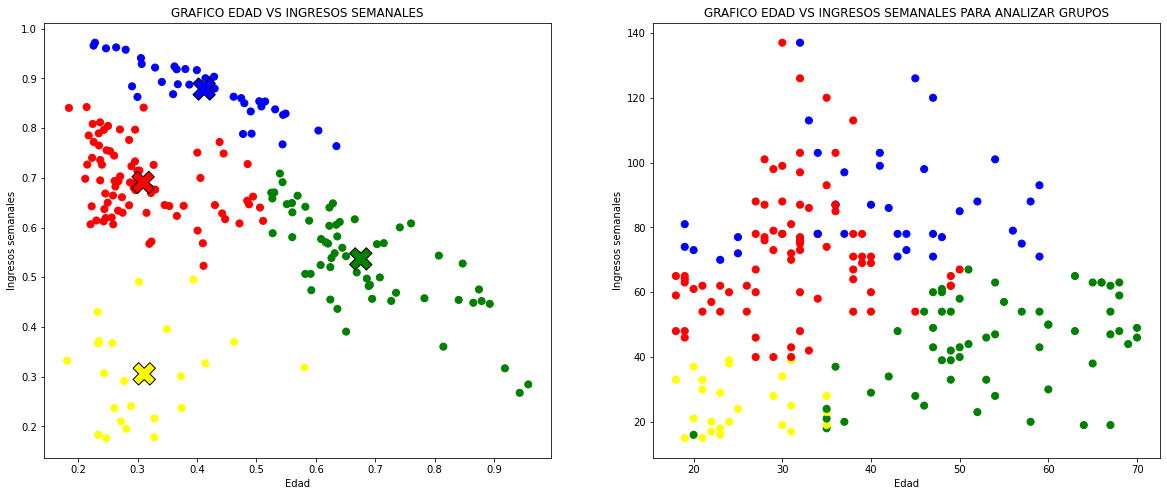

In [ ]:
plt.figure(figsize=(20,8)) #Creo figura de 10x8

plt.subplot(121)
plt.scatter(x[:, 0], x[:, 1], c=coloresgrupos, marker = "o", s=50) #Represento en el eje x edad y en el y ingresos semanales con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.scatter(centros[:, 0],centros[:, 1], marker='X', c=colores,edgecolor='black', s=500)#Represento en el eje x edad y en el y ingresos semanales con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 500 los centroides.
plt.xlabel("Edad")#Valor eje x
plt.ylabel("Ingresos semanales")#Valor eje y
plt.title("GRAFICO EDAD VS INGRESOS SEMANALES")#Titulo del grafico

plt.subplot(122)
plt.scatter(xsinnorm[:, 0], xsinnorm[:, 1], c=coloresgrupos, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.xlabel("Edad") #Valor eje x
plt.ylabel("Ingresos semanales") #Valor eje y
plt.title("GRAFICO EDAD VS INGRESOS SEMANALES PARA ANALIZAR GRUPOS") #Titulo del grafico
plt.show() #Muestro grafico

##ANALISIS GRAFICO EDAD VS INGRESOS SEMANALES.

1.   Grupo disperso en edad e ingresos semanales mayores a 70 en miles de pesos (Color AZUL)
2.   Grupo con edad mayor a 35 años e ingresos semanales menores a 65 en miles de pesos. (Color VERDE)
3.   Grupo con edad menor a 35 años e ingresos semanales menores a 40 en miles de pesos. (Color Amarillo)
4.   Grupo con edad menores a 50 años e ingresos semanales mayores a 40 en miles de pesos. (Color Rojo)


##Conclusión de graficas en dos dimensiones.
En estos casos dan un ejemplo que si solo analizamos dos datos sin tener en cuenta un tercero encontraremos diferente segmentos de mercado segun los datos analizados. Hay que tener en cuenta que se elige la utilización de tres datos ya que al tener la posibilidad de hacerlo (por la cantidad de los mismos que me brinda el dataset original) nos dará una mejor segmentación y se encontrar grupos mas específicos. 

Ademas de ello KMeans nos da la posibilidad de aplicarlo solo con dos datos y hacer ese analisis. Obteniendo mas cantidad de segmentos del mercado obviando un dato de los tres brindados.

##Grupos de clientes segun los analisis realizados: 

#Grupo Azul:

Clientes con puntaje menor al 40% y menores de 60 años e ingresos semanales mayores a 70 en miles de pesos. (Malos clientes de baja y mediana edad con ingresos semanales muy buenos)

#Grupo Verde: 

Clientes con puntaje menores al 60% y mayores a 35 años e ingresos semanales menores a 65 en miles de pesos. (Clientes malos y regulares, personas mayores y con ingresos bajos y regulares)

#Grupo Amarillo:

Clientes con puntaje mayor a 60% y menores de 35 años e ingresos semanales menores a 40 en miles de pesos. (Clientes buenos a muy buenos con bajo ingreso y jovenes)

#Grupo Rojo: 

Clientes con puntaje mayor a 40% y menores de 50 años e ingresos semanales mayores a 40 en miles de pesos. (Clientes regulares a buenos de baja y mediana edad con buenos ingresos)



#DATOS POR SEXO 
En principio se decidió analizar los datos sin tener en cuenta el sexo ya que se buscaba determinar el grupo de clientes en general. Sin embargo en un shopping podria determinar si son mejores clientes las mujeres que los hombres, si tienen mayor ingresos uno u otros y esto podria significar abrir locales o decidir estrategias de venta mas orientadas segun el sexo. 

Por lo tanto vamos a hacer un analisis separando en dos datasets diferentes por hombres y por mujeres volver hacer un analisis y tener tres opciones para que pueda elegir el equipo de marketing. Uno con el público en general, otro orientado a los hombres y otros orientados a las mujeres.

En un primer paso separaremos el dataframe en dos partes. Uno que va a tener los datos de los hombres y otro los datos de las mujeres.

#Dataframe Hombres

In [ ]:
csvhombres = clientescsvhm.copy(deep=True) #Hago una copia.
csvhombres = csvhombres[csvhombres.sexo.str.contains('M')] #Genero un DF solo de masculinos.
csvhombressinnor = csvhombres.copy(deep=True) #Hago una copia para luegro graficar y ver grupos
print(csvhombres.info())
#Imprimimos la información encontramos que se analizaran 88 datos no hya faltante de datos.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         88 non-null     int64 
 1   sexo                       88 non-null     object
 2   edad                       88 non-null     int64 
 3   ingresosSemanales(miles$)  88 non-null     int64 
 4   puntaje(1-100)             88 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 4.1+ KB
None


Normalización de datos y eliminación de columnas id y sexo.

In [ ]:
del(csvhombres["id"]) # Saco la fila id ya qe no va a ser utilizada.
del(csvhombres["sexo"]) #Saco la fila sexo porque ya se determinó que son Masculinos.

In [ ]:
csvhombres = pd.DataFrame (normalize(csvhombres) ,columns= csvhombres.columns )

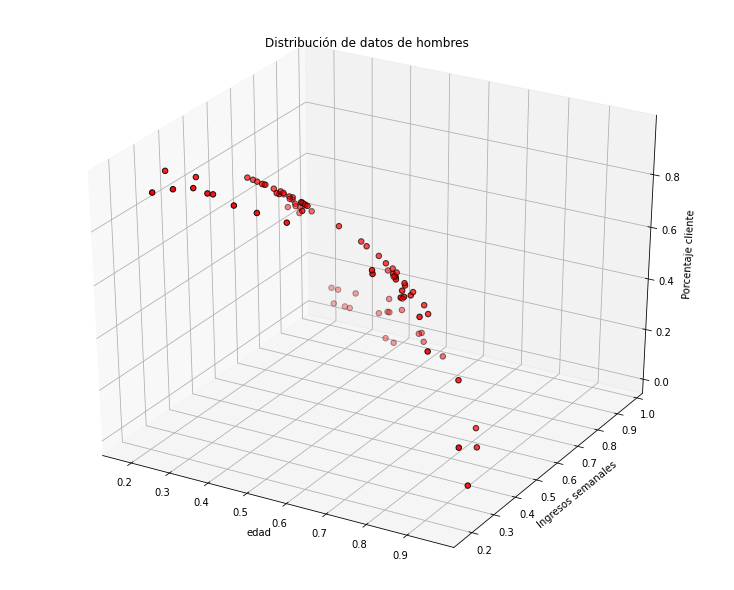

In [ ]:
xhombres = np.array(csvhombres[["edad","ingresosSemanales(miles$)","puntaje(1-100)"]]) #creamos un arreglo para los datos normalizados
hombressinnor = np.array(csvhombressinnor[["edad","ingresosSemanales(miles$)","puntaje(1-100)"]]) #Creamos un arreglo datos no norm.
figura = plt.figure(figsize=(10,8)) #Creamos una figura para crear nuestro grafico 3D tamaño 10,8
ax = Axes3D(figura) #Cremos el grafico 3d
ax.scatter(xhombres[:, 0], xhombres[:, 1], xhombres[:, 2],s=30,c = "red",edgecolor='black') #Se realiza un grafico para ver como estan distribuidos
ax.set_xlabel("edad") #Nombre eje x
ax.set_ylabel("Ingresos semanales") # Nombre eje y
ax.set_zlabel("Porcentaje cliente") # Nombre eje z 
plt.title('Distribución de datos de hombres') # Nombre de titulo
plt.show()# Mostramos el gráfico

Aplicación codo de Jambú para determinar el n_clusters

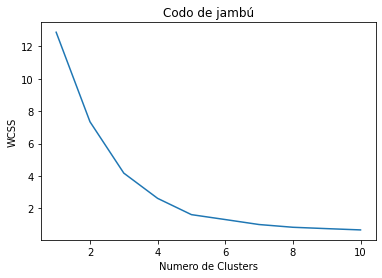

In [ ]:
wcssh = [] #creo una lista para ir almacenando los valorse wcss 
          #wcss es un indicador de cuan similares son los individuos dentro de los clusters

for i in range(1,11): #Creo un ciclo for para ir guardando cada wcss para cada cada uno de los clusters de 1 - 10
    kmeansh = KMeans(n_clusters=i) #aplico el metodo KMeans para cada clusters y lo guardo como objeto en kmeans
    kmeansh.fit(csvhombres) #aplico kmeans a mi base de datos de hombres
    wcssh.append(kmeansh.inertia_) #Le agergo a wcss los valores de inertia_ que son las sumas de las distancias entre clusters mas cercanos al centro

plt.plot((lista110),wcssh) #grafico todos los closters posibles en el eje x y todos los wcss anteriormente para ver que n_cluster voy a utilizar
plt.xlabel('Numero de Clusters') #Nombre eje x
plt.ylabel('WCSS') # Nombre eje y
plt.title('Codo de jambú') # Nombre de titulo
plt.show() #mostrar grafico

Utilizaremos 4 clusters para el analisis

In [ ]:
kmh = KMeans(n_clusters=4, init='random', random_state=0)  # Creo el clasificador
y_kmh = kmh.fit_predict(xhombres)  # Obtengo la clasificación de cada muestra de X
centroshombres = kmh.cluster_centers_ #Obtenemos los centroides.

Graficamos en 3d todos los datos con sus centros normalizados y lluego anilizaremos sus caras con los datos sin noramalizar

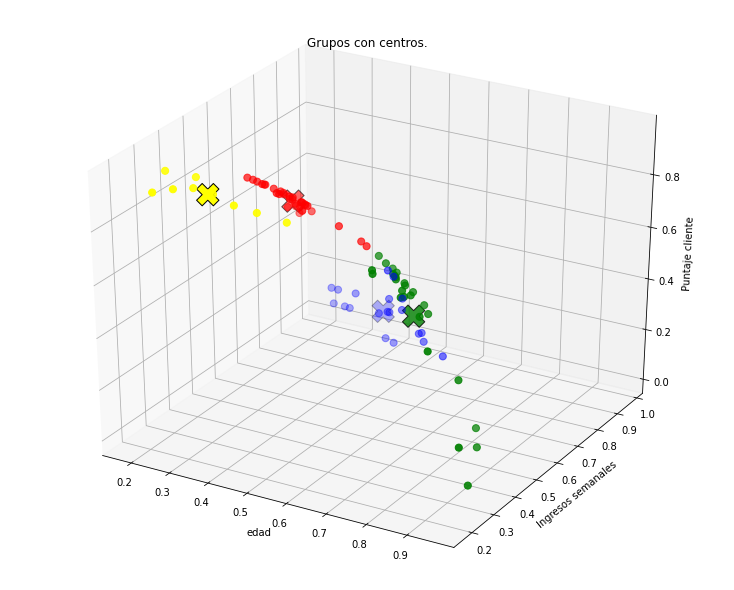

In [ ]:
coloreshombres=['green','blue','yellow','red'] #defino los 4 colores de mis grupos 

coloresgruposh=[] #creo una lista para poder agregar los colores para cada fila de mis datos 

for coloresfilh in y_kmh: #Realizo un ciclo for para asignar los colores a cada uno de mis datos
    coloresgruposh.append(colores[coloresfilh])

figura = plt.figure(figsize=(10,8)) #Creamos una figura para crear nuestro grafico 3D tamaño 10x8
ax = Axes3D(figura) #Cremos el grafico 3D
ax.scatter(xhombres[:, 0], xhombres[:, 1], xhombres[:, 2], c=coloresgruposh, marker = "o", s=50) #Grafico mis datos con los colores de cada grupo
ax.scatter(centroshombres[:, 0], centroshombres[:, 1], centroshombres[:, 2], marker='X', c=colores,edgecolor='black', s=500) #Grafico los 4 centros obtenidos 
ax.set_xlabel("edad") #Nombre eje x
ax.set_ylabel("Ingresos semanales") # Nombre eje y
ax.set_zlabel("Puntaje cliente") #Nombre eje z
plt.title('Grupos con centros.') # Nombre de titulo
plt.show()# Mostramos el gráfico

In [ ]:
print(y_kmh) #conformación de grupos normalizados hombres

[2 2 0 0 0 2 2 0 0 2 2 2 2 0 0 2 2 0 3 0 0 0 0 0 3 0 3 3 0 0 3 3 0 3 0 0 3
 0 3 0 3 0 3 3 0 0 0 0 3 3 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 1 1 1 1 3 1
 3 1 3 1 3 1 3 1 3 3 1 3 1 3]


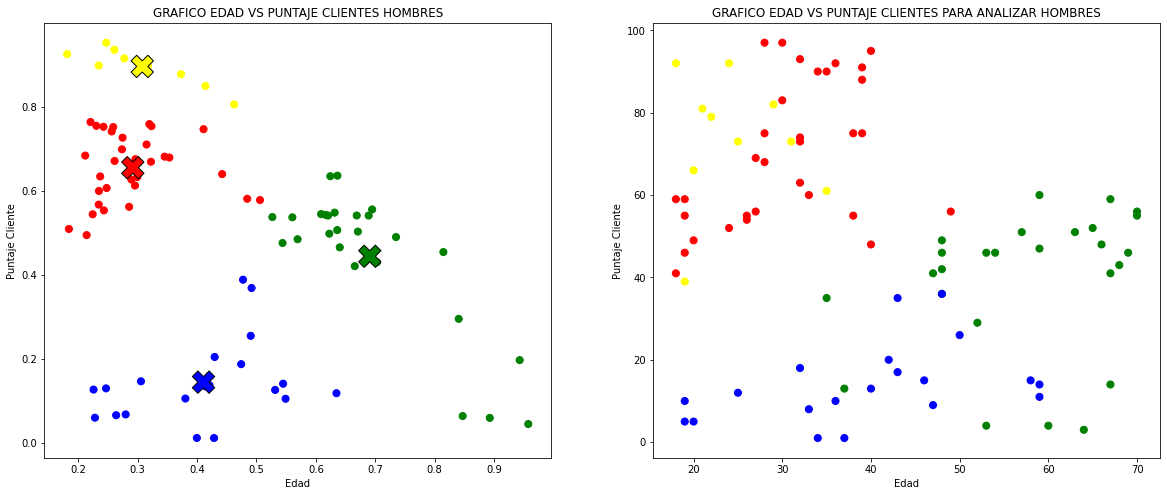

In [ ]:
plt.figure(figsize=(20,8)) #Creo figura de 20x8

plt.subplot(121)
plt.scatter(xhombres[:, 0], xhombres[:, 2], c=coloresgruposh, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.scatter(centroshombres[:, 0],centroshombres[:, 2], marker='X', c=coloreshombres,edgecolor='black', s=500)#Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 500 los centroides.
plt.xlabel("Edad") #Valor eje x
plt.ylabel("Puntaje Cliente") #Valor eje y
plt.title("GRAFICO EDAD VS PUNTAJE CLIENTES HOMBRES") #Titulo del grafico

plt.subplot(122)
plt.scatter(hombressinnor[:, 0], hombressinnor[:, 2], c=coloresgruposh, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.xlabel("Edad") #Valor eje x
plt.ylabel("Puntaje Cliente") #Valor eje y
plt.title("GRAFICO EDAD VS PUNTAJE CLIENTES PARA ANALIZAR HOMBRES") #Titulo del grafico

plt.show() #Muestro grafico

##ANALISIS GRAFICO EDAD VS PUNTAJES CLIENTES DE HOMBRES

1.   Grupo con un puntaje menor a 40% distribuido en edad.(Color AZUL)
2.   Grupo con un puntaje menores a 60% con edad mayor a 45 años.(Color VERDE)
3.   Grupo con puntaje mayor de 40% con edades menores a 35 años.(Color Amarillo)
4.   Grupo con puntaje mayor a 40% con edades menores a 50 años  (Color ROJO)


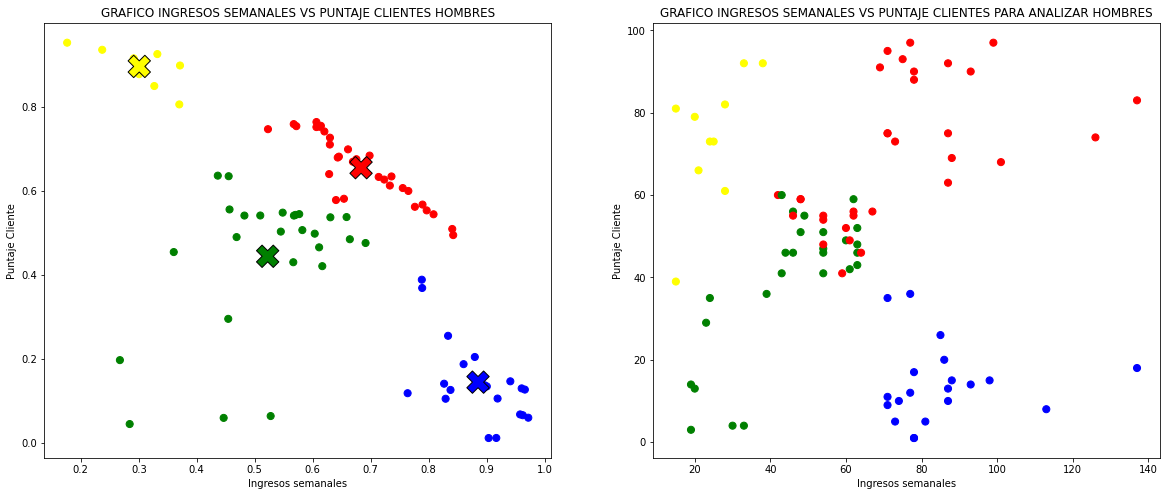

In [ ]:
plt.figure(figsize=(20,8)) #Creo figura de 20x8

plt.subplot(121)
plt.scatter(xhombres[:, 1], xhombres[:, 2], c=coloresgruposh, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.scatter(centroshombres[:, 1],centroshombres[:, 2], marker='X', c=coloreshombres,edgecolor='black', s=500)#Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 500 los centroides.
plt.xlabel("Ingresos semanales")#Valor eje x
plt.ylabel("Puntaje Cliente")#Valor eje y
plt.title("GRAFICO INGRESOS SEMANALES VS PUNTAJE CLIENTES HOMBRES")#Titulo del grafico

plt.subplot(122)
plt.scatter(hombressinnor[:, 1], hombressinnor[:, 2], c=coloresgruposh, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.xlabel("Ingresos semanales") #Valor eje x
plt.ylabel("Puntaje Cliente") #Valor eje y
plt.title("GRAFICO INGRESOS SEMANALES VS PUNTAJE CLIENTES PARA ANALIZAR HOMBRES") #Titulo del grafico

plt.show() #Muestro grafico

##ANALISIS GRAFICO INGRESOS SEMANALES VS PUNTAJES  HOMBRES

1.   Grupo con puntajes menores a 40 e ingresos semanales mayores a 70 en miles de pesos(Color AZUL)
2.   Grupo con ingresos semanales menores a 60 y puntaje menor al 60%(Color VERDE)
3.   Grupo con ingresos semanales menores a 40 miles de pesos con un puntaje mayor al 60%.(Color Amarillo)
4.   Grupo con ingresos semanales mayores a 50 y puntaje de clientes mayores a 40%.(Color ROJO)


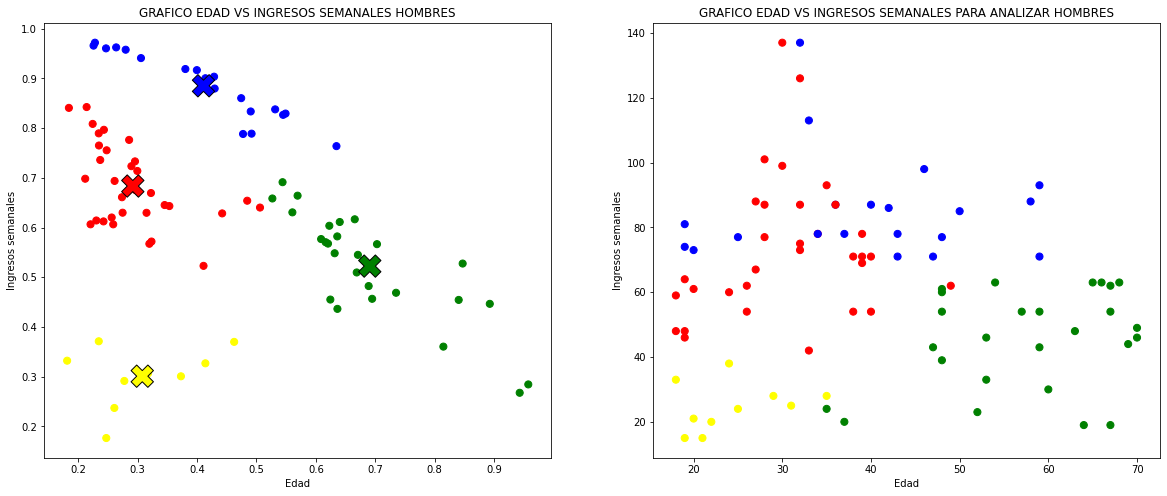

In [ ]:
plt.figure(figsize=(20,8)) #Creo figura de 20x8

plt.subplot(121)
plt.scatter(xhombres[:, 0], xhombres[:, 1], c=coloresgruposh, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.scatter(centroshombres[:, 0],centroshombres[:, 1], marker='X', c=coloreshombres,edgecolor='black', s=500)#Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 500 los centroides.
plt.xlabel("Edad")#Valor eje x
plt.ylabel("Ingresos semanales")#Valor eje y
plt.title("GRAFICO EDAD VS INGRESOS SEMANALES HOMBRES")#Titulo del grafico

plt.subplot(122)
plt.scatter(hombressinnor[:, 0], hombressinnor[:, 1], c=coloresgruposh, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.xlabel("Edad")#Valor eje x
plt.ylabel("Ingresos semanales")#Valor eje y
plt.title("GRAFICO EDAD VS INGRESOS SEMANALES PARA ANALIZAR HOMBRES") #Titulo del grafico

plt.show() #Muestro grafico

##ANALISIS GRAFICO EDAD VS INGRESOS SEMANALES HOMBRES.

1.   Grupo con edad menor a 60 años e ingresos semanales mayores a 70 en miles de pesos(Color AZUL)
2.   Grupo con ingresos semanales menores a 60 y mayores de 45 años(Color VERDE)
3.   Grupo con ingresos semanales menores a 40 miles de pesos con edad menor a 35 años.(Color Amarillo)
4.   Grupo con ingresos semanales mayores a 50 y edad menor a 50 años.(Color ROJO)

##Grupos de clientes Hombres según los análisis realizados: 

#Grupo Azul:

Grupo con edad menor a 60 años e ingresos semanales mayores a 70 en miles de pesos con puntajes menores a 40%. (Clientes jovenes y grandes con muy buenos ingresos pero muy malos clientes)

#Grupo Verde: 

Grupo con ingresos semanales menores a 60 y mayores de 45 años con puntaje menor al 60%. (Clientes granes en edad coc regulares ingresos y de malos a regulares clientes)

#Grupo Amarillo:

Grupo con ingresos semanales menores a 40 miles de pesos con edad menor a 35 años con un puntaje mayor al 60%. (Clientes con bajo ingreso jovenes y muy buenos clientes)

#Grupo Rojo: 

Grupo con ingresos semanales mayores a 50 y edad menor a 50 años con puntaje de clientes mayores a 40%. (Clientes con muy buenos ingresos, jovenes y grandes y clientes regulares a buenos.)

#Dataframe Mujeres

In [ ]:
csvmujeres = clientescsvhm.copy(deep=True) #Hago una copia.
csvmujeres = csvmujeres[csvmujeres.sexo.str.contains('F')] #Genero un DF solo de femeninos.
csvmujeressinnor = csvmujeres.copy(deep=True) #Hago una copia para luegro graficar y ver grupos
mujeressinnor = np.array(csvmujeressinnor[["edad","ingresosSemanales(miles$)","puntaje(1-100)"]])
print(csvmujeres.info())
#Imprimimos la información encontramos que se analizaran 88 datos no hya faltante de datos.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 2 to 196
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         112 non-null    int64 
 1   sexo                       112 non-null    object
 2   edad                       112 non-null    int64 
 3   ingresosSemanales(miles$)  112 non-null    int64 
 4   puntaje(1-100)             112 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 5.2+ KB
None


Elimino id y sexo.

In [ ]:
del(csvmujeres["id"]) 
del(csvmujeres["sexo"]) 

Normalizo los datos.

In [ ]:
csvmujeres = pd.DataFrame (normalize(csvmujeres) ,columns= csvmujeres.columns )

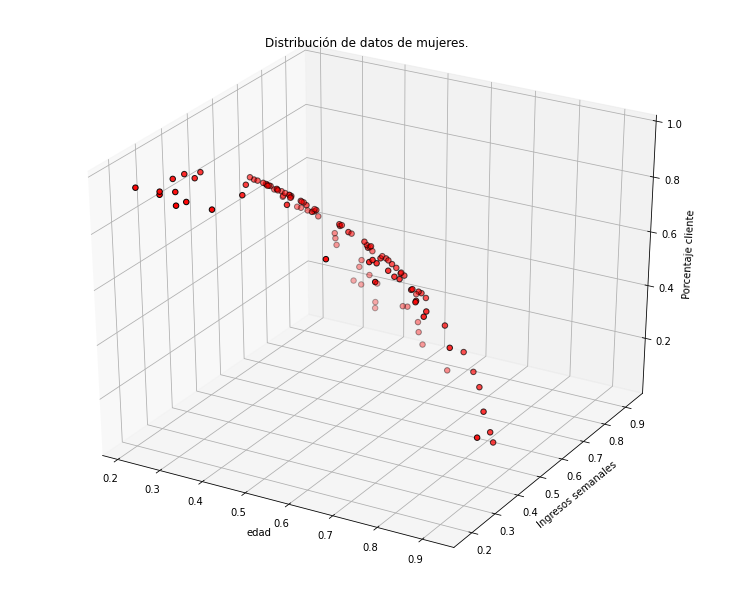

In [ ]:
xmujeres = np.array(csvmujeres[["edad","ingresosSemanales(miles$)","puntaje(1-100)"]]) #creamos un arreglo para los datos
figura = plt.figure(figsize=(10,8)) #Creamos una figura para crear nuestro grafico 3D tamaño 10,8
ax = Axes3D(figura) #Cremos el grafico 3d
ax.scatter(xmujeres[:, 0], xmujeres[:, 1], xmujeres[:, 2],s=30,c = "red",edgecolor='black') #Se realiza un grafico para ver como estan distribuidos
ax.set_xlabel("edad") #Nombre eje x
ax.set_ylabel("Ingresos semanales") # Nombre eje y
ax.set_zlabel("Porcentaje cliente") # Nombre eje z 
plt.title('Distribución de datos de mujeres.') # Nombre de titulo
plt.show()# Mostramos el gráfico

Aplicación codo de Jambú para determinar el n_clusters

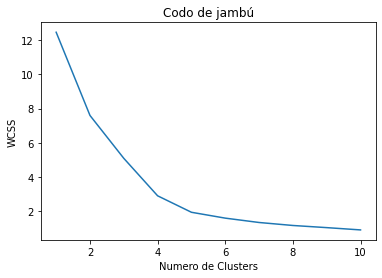

In [ ]:
wcssm = [] #creo una lista para ir almacenando los valorse wcss 
          #wcss es un indicador de cuan similares son los individuos dentro de los clusters

for i in range(1,11): #Creo un ciclo for para ir guardando cada wcss para cada cada uno de los clusters de 1 - 10
    kmeansm = KMeans(n_clusters=i) #aplico el metodo KMeans para cada clusters y lo guardo como objeto en kmeans
    kmeansm.fit(xmujeres) #aplico kmeans a mi base de datos de hombres
    wcssm.append(kmeansm.inertia_) #Le agergo a wcss los valores de inertia_ que son las sumas de las distancias entre clusters mas cercanos al centro

plt.plot((lista110),wcssm) #grafico todos los closters posibles en el eje x y todos los wcss anteriormente para ver que n_cluster voy a utilizar
plt.xlabel('Numero de Clusters') #Nombre eje x
plt.ylabel('WCSS') # Nombre eje y
plt.title('Codo de jambú') # Nombre de titulo
plt.show() #mostrar grafico

Se utilizan 4 n_clusters.

In [ ]:
kmm = KMeans(n_clusters=4, init='random', random_state=0)  # Creo el clasificador
y_kmm = kmm.fit_predict(xmujeres)  # Obtengo la clasificación de cada muestra de X
centrosmujeres = kmm.cluster_centers_ #Obtenemos los centroides.

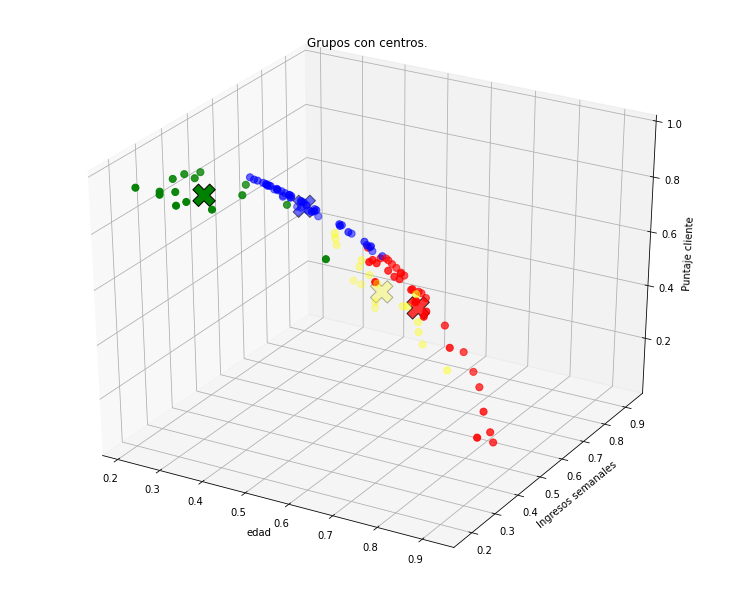

In [ ]:
coloresmujeres=['green','blue','yellow','red'] #defino los 4 colores de mis grupos 

coloresgruposm=[] #creo una lista para poder agregar los colores para cada fila de mis datos 

for coloresfilm in y_kmm: #Realizo un ciclo for para asignar los colores a cada uno de mis datos
    coloresgruposm.append(colores[coloresfilm])

figura = plt.figure(figsize=(10,8)) #Creamos una figura para crear nuestro grafico 3D tamaño 10x8
ax = Axes3D(figura) #Cremos el grafico 3D
ax.scatter(xmujeres[:, 0], xmujeres[:, 1], xmujeres[:, 2], c=coloresgruposm, marker = "o", s=50) #Grafico mis datos con los colores de cada grupo
ax.scatter(centrosmujeres[:, 0], centrosmujeres[:, 1], centrosmujeres[:, 2], marker='X', c=colores,edgecolor='black', s=500) #Grafico los 4 centros obtenidos 
ax.set_xlabel("edad") #Nombre eje x
ax.set_ylabel("Ingresos semanales") # Nombre eje y
ax.set_zlabel("Puntaje cliente") #Nombre eje z
plt.title('Grupos con centros.') # Nombre de titulo
plt.show()# Mostramos el gráfico

In [ ]:
print(y_kmm) #conformación de grupos normalizados hombres

[3 0 0 0 3 0 0 0 3 0 3 0 3 3 3 3 0 0 3 0 3 0 3 0 3 0 3 0 3 1 1 1 3 1 3 3 1
 3 3 3 3 1 3 3 3 1 1 3 3 1 3 1 1 3 3 1 1 3 1 1 3 1 3 1 1 1 1 3 1 3 1 1 1 2
 1 2 1 1 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 1 1 1 2 2 1 2 1 1 2 2 2 1 2 1 1 2 1
 2]


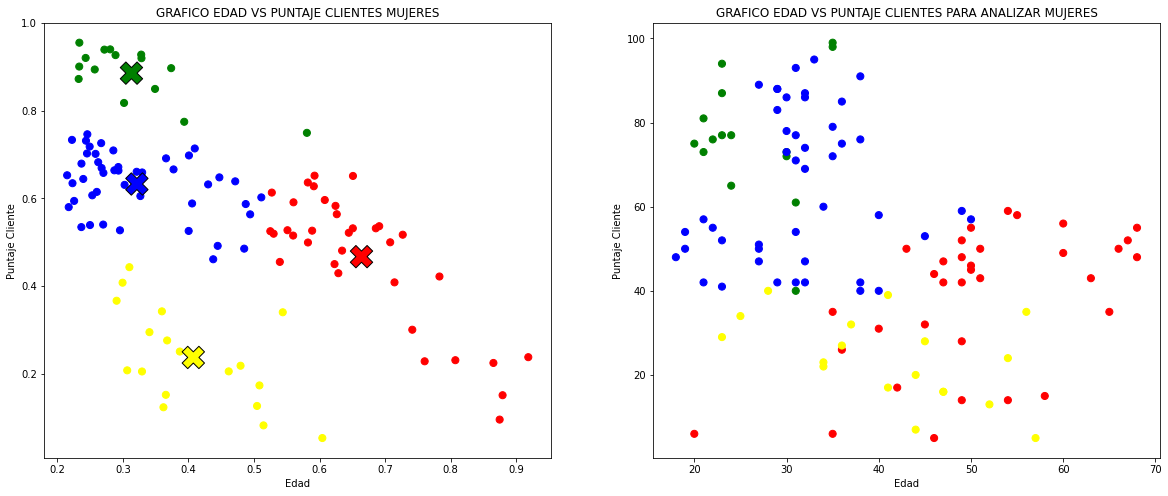

In [ ]:
plt.figure(figsize=(20,8)) #Creo figura de 20x8

plt.subplot(121)
plt.scatter(xmujeres[:, 0], xmujeres[:, 2], c=coloresgruposm, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.scatter(centrosmujeres[:, 0],centrosmujeres[:, 2], marker='X', c=coloresmujeres,edgecolor='black', s=500)#Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador cruz y tamaño 500 los centroides.
plt.xlabel("Edad") #Valor eje x
plt.ylabel("Puntaje Cliente") #Valor eje y
plt.title("GRAFICO EDAD VS PUNTAJE CLIENTES MUJERES") #Titulo del grafico

plt.subplot(122)
plt.scatter(mujeressinnor[:, 0], mujeressinnor[:, 2], c=coloresgruposm, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.xlabel("Edad") #Valor eje x
plt.ylabel("Puntaje Cliente") #Valor eje y
plt.title("GRAFICO EDAD VS PUNTAJE CLIENTES PARA ANALIZAR MUJERES") #Titulo del grafico

plt.show() #Muestro grafico

##ANALISIS GRAFICO EDAD VS PUNTAJES CLIENTES DE MUJERES

1.   Grupo con un puntaje mayor a 40% menores de 50 años.(Color AZUL)
2.   Grupo con un puntaje mayor al 60% con edad menor a 35 años .(Color VERDE)
3.   Grupo con puntaje menor de 40% distribuido en edad.(Color Amarillo)
4.   Grupo con puntaje menor a 60% y mayores de 35 años. (Color ROJO)

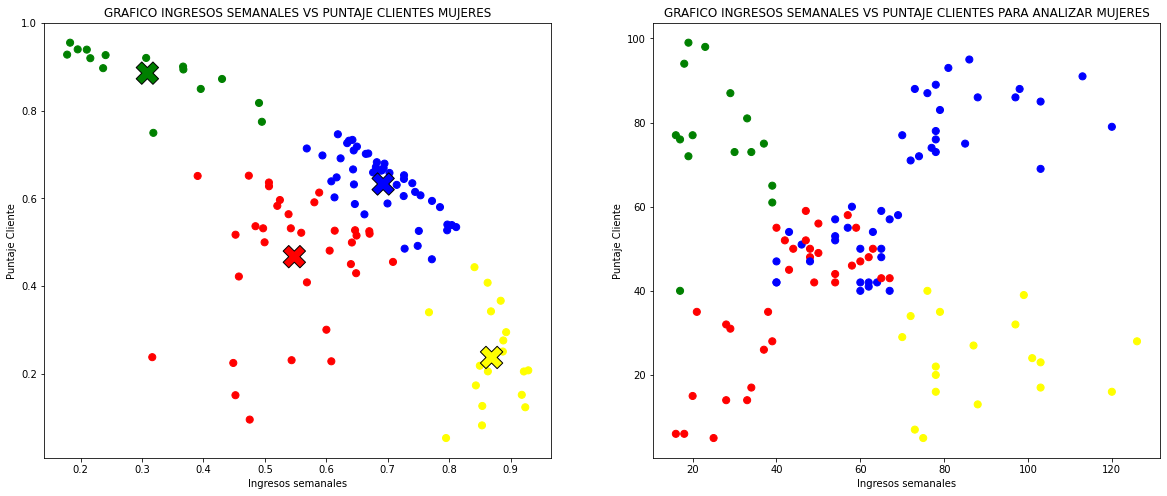

In [ ]:
plt.figure(figsize=(20,8)) #Creo figura de 20x8

plt.subplot(121)
plt.scatter(xmujeres[:, 1], xmujeres[:, 2], c=coloresgruposm, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.scatter(centrosmujeres[:, 1],centrosmujeres[:, 2], marker='X', c=coloresmujeres,edgecolor='black', s=500)#Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador cruz y tamaño 500 los centroides.
plt.xlabel("Ingresos semanales")#Valor eje x
plt.ylabel("Puntaje Cliente")#Valor eje y
plt.title("GRAFICO INGRESOS SEMANALES VS PUNTAJE CLIENTES MUJERES")#Titulo del grafico

plt.subplot(122)
plt.scatter(mujeressinnor[:, 1], mujeressinnor[:, 2], c=coloresgruposm, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.xlabel("Ingresos semanales")#Valor eje x
plt.ylabel("Puntaje Cliente")#Valor eje y
plt.title("GRAFICO INGRESOS SEMANALES VS PUNTAJE CLIENTES PARA ANALIZAR MUJERES") #Titulo del grafico

plt.show() #Muestro grafico



##ANALISIS GRAFICO INGRESOS SEMANALES VS PUNTAJES MUJERES

1.   Grupo con puntajes mayores a 40 e ingresos semanales mayores a 40 en miles de pesos. (Color AZUL)
2.   Grupo con ingresos semanales menores a 65 y puntaje menor al 60%. (Color ROJO)
3.   Un tercer grupo entre con ingresos semanales mayores a 70 en miles de pesos con un porcentaje menor al 40%.(Color Amarillo)
4.   Un cuarto grupo con ingresos semanales menores a 40 en miles de pesos y puntaje de clientes mayores a 60%.(Color VERDE)


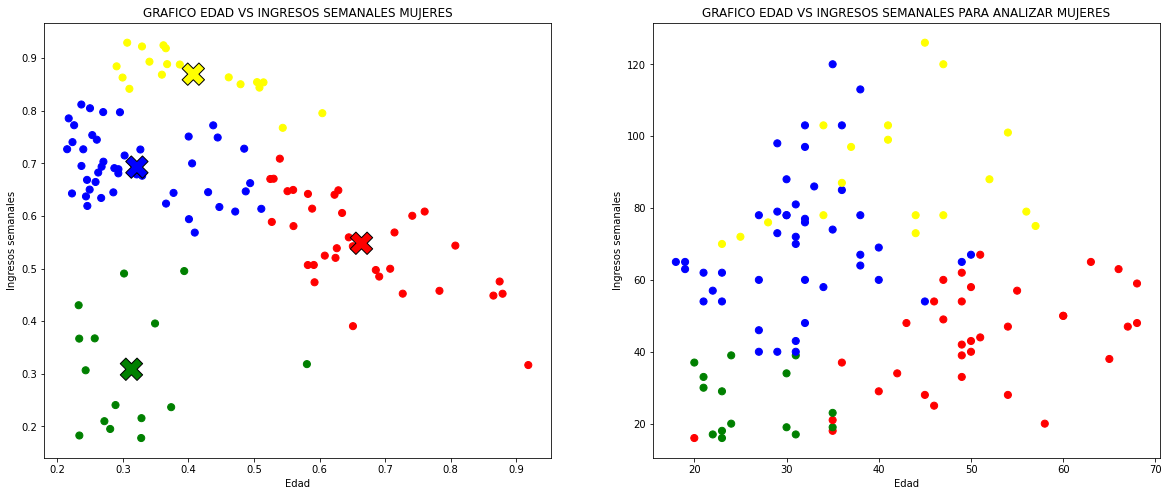

In [ ]:
plt.figure(figsize=(20,8)) #Creo figura de 20x8

plt.subplot(121)
plt.scatter(xmujeres[:, 0], xmujeres[:, 1], c=coloresgruposm, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.scatter(centrosmujeres[:, 0],centrosmujeres[:, 1], marker='X', c=coloresmujeres,edgecolor='black', s=500)#Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador cruz y tamaño 500 los centroides.
plt.xlabel("Edad")#Valor eje x
plt.ylabel("Ingresos semanales")#Valor eje y
plt.title("GRAFICO EDAD VS INGRESOS SEMANALES MUJERES")#Titulo del grafico

plt.subplot(122)
plt.scatter(mujeressinnor[:, 0], mujeressinnor[:, 1], c=coloresgruposm, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.xlabel("Edad")#Valor eje x
plt.ylabel("Ingresos semanales")#Valor eje y
plt.title("GRAFICO EDAD VS INGRESOS SEMANALES PARA ANALIZAR MUJERES") #Titulo del grafico

plt.show() #Muestro grafico


##ANALISIS GRAFICO EDAD VS INGRESOS SEMANALES MUJERES

1.   Grupo con edadmenores a 60 años e ingresos semanales mayores a 40 en miles de pesos. (Color AZUL)
2.   Grupo con ingresos semanales menores a 65 y mayores a 35 años. (Color ROJO)
3.   Un tercer grupo entre con ingresos semanales mayores a 70 en miles de pesos distribuidos en edad.(Color Amarillo)
4.   Un cuarto grupo con ingresos semanales menores a 40 en miles de pesos y menos de 35 años de edad.(Color VERDE)


##Grupos de clientes Mujeres según los análisis realizados: 

#Grupo Azul:
Grupo con un puntaje mayor a 40% menores de 50 años e ingresos semanales mayores a 40 en miles de pesos. (Clientes regulares a muy buenos jovenes e ingresos medianamente altos)


#Grupo Verde: 
Grupo con un puntaje mayor al 60% con edad menor a 35 años e ingresos semanales menores a 40 en miles de pesos. (Clientes muy buenos con bajos ingresos y jovenes)


#Grupo Amarillo:
Grupo con puntaje menor de 40% distribuido en edad e ingresos semanales menores a 65. (Clientes de todas las edades con ingresos semanales de malos a regulares y muy malos clientes)


#Grupo Rojo: 
Grupo con puntaje menor a 60% y mayores de 35 años e ingresos semanales menores a 65. (Clientes malos a regulares mayores con ingresos malos a regulares)


##Finalmente como agregado se realiza un analisis de los cuales YO considero los puntos mas determinantes para cada cliente. (Su ingreso semanal y su puntaje). Este analisis se entregará al equipo de marketing como dato adicional que tengan en cuenta. 

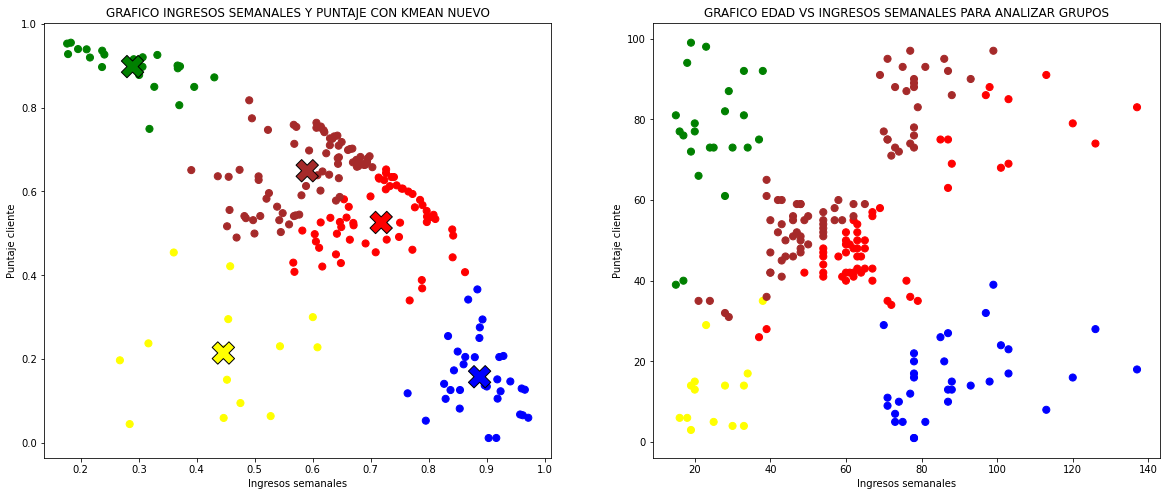

In [ ]:
clientescsvdosdatos= clientescsv.copy(deep=True) # Se hace una copia del csv 

del(clientescsvdosdatos["edad"]) #Se borra los datos de edad

xdos = np.array(clientescsv[["ingresosSemanales(miles$)","puntaje(1-100)"]]) #creamos un arreglo para los datos
kmdos = KMeans(n_clusters=5, init='random', random_state=0)  # Creo el clasificador con 5 n_clusters (Esto se hace ya que como ya se hizo el gráfico se ve muy bien que son 5 grupos)
y_kmdos = kmdos.fit_predict(xdos)  # Obtengo la clasificación de cada muestra de X
centrosdos = kmdos.cluster_centers_ #Obtenemos los centroides.

colorescdos=['green','blue','yellow','red','brown'] #defino los 5 colores de mis grupos 

coloresdos=[] #creo una lista para poder agregar los colores para cada fila de mis datos 

for coloresfilm in y_kmdos: #Realizo un ciclo for para asignar los colores a cada uno de mis datos
    coloresdos.append(colorescdos[coloresfilm])


plt.figure(figsize=(20,8)) #Creo figura de 10x8

plt.subplot(121)

plt.scatter(xdos[:, 0], xdos[:, 1], c=coloresdos, marker = "o", s=50) #Represento en el eje x Ingresos semanales y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.scatter(centrosdos[:, 0],centrosdos[:, 1], marker='X', c=colorescdos,edgecolor='black', s=500)#Represento en el eje x Ingresos semanales y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador cruz y tamaño 500 los centroides.
plt.xlabel("Ingresos semanales")#Valor eje x
plt.ylabel("Puntaje cliente")#Valor eje y
plt.title("GRAFICO INGRESOS SEMANALES Y PUNTAJE CON KMEAN NUEVO")#Titulo del grafico

plt.subplot(122)
plt.scatter(xsinnorm[:, 1], xsinnorm[:, 2], c=coloresdos, marker = "o", s=50) #Represento en el eje x edad y en el y puntaje con color de la lista 
                                                                   #anteriormente creada con marcador circulo y tamaño 50 los clientes.
plt.xlabel("Ingresos semanales")#Valor eje x
plt.ylabel("Puntaje cliente")#Valor eje y
plt.title("GRAFICO EDAD VS INGRESOS SEMANALES PARA ANALIZAR GRUPOS") #Titulo del grafico
plt.show() #Muestro grafico

##Grupos de clientes Segun Ingresos Semanales y Puntaje de cliente.

#Grupo Azul:

Grupo con Puntajes menores a 40% e ingresos semanales mayores a 70 en miles de pesos. (Clientes malos con buen ingreso)

#Grupo Verde: 

Grupo con Puntaje mayores a 40%  e ingresos semanales menores a 40 en miles de pesos. (Clientes regulares a buenos con ingreso bajo)

#Grupo Rojo: 

Grupo con Puntaje mayores a 40 con ingresos semanales mayores a 45 en miles de pesos. (Clientes regulares a buenos con ingresos altos.)

#Grupo Amarillo:

Grupo con puntaje menor al 40% e ingresos semanales menores a 40 en miles de pesos. (Clientes muy malos con bajos ingresos semanales)

#Grupo Marrón:

Grupo con puntaje mayor a 40% e ingresos semanales entre 40 y 80 en miles de pesos. (Clientes regulares a buenos con ingresos diferentes ingresos)


#Conclusiones: 


###*   Segun los datos y como trabaja KMeans se puede abordar este trabajo desde varios puntos de vista. 
###*   Es importante la normalización de datos para la utilización de Kmeans. En un principio este trabajo se realizó sin normalizar los datos. Buscando en internet viendo graficas e investigando en la mayoria de los casos se normalizan para tener mejores resultados ya que Kmeans trabaja con las distancias de los centroides con los datos y en caso de que un dato sea muy diferente o mas grandes tendrá mas "peso" para decidir los grupos.
###*   Luego de los diferentes datos y clientes obtenidos se encuentran 122 mujeres en el testeo y 88 hombres. En mi caso si tuviera la posibilidad de realizar una nueva encuesta buscaría que esten en igual de proposión de hombres y mujeres para poder hacer un mejor analisis. Sin embargo esto muestra que las mujeres van mas a los shoppings que los hombres teniendo un peso mayor el analisis que se hizo sobre las mujeres. 
###*   El agregado se hizo de forma personal y según mi criterio para que el equipo de marketing tuviera mas opciones y mas datos para realizar su segmentación del mercado.
###*   La utilización de todos los datos no es necesaria pero en mi caso de los datos brindados por el dataset elimine el id y el sexo para cada uno de los analisis.
